In [1]:
import numpy as np
import pandas as pd
import sys
from sklearn.preprocessing import normalize

In [2]:

def extractSpeechData(path):
    data = []
    data_point = []
    file_object = open(path)
    if file_object:
        i = 0
        num_string = str(i) + ":"
        for line in file_object:
            data_line = line.split()
            if num_string == data_line[0] or "END" in data_line:
                del data_point[0]
                data.append(data_point)
                data_point = []
                data_point.extend(data_line)
                i += 1
                num_string = str(i) + ":"
            else:
                data_point.extend(data_line)
        file_object.close()
    else:
        print("Unable to open Speech Data File")
    del data[0]

    converted_file = []
    for data_line in data:
        converted_data = []
        for data_point in data_line:
            converted_data.append(float(data_point))
        converted_file.append(converted_data)
    data = converted_file

    check = 0
    frame = 0
    formed_data = []

    for data_feature in data:
        formed_data.append(frame)
        formed_data.extend(data_feature)
        if check == 0:
            array_data = np.asarray(formed_data)
            check = 1
        else:
            b = np.asarray(formed_data)
            array_data = np.vstack((array_data, b))
        frame += 1
        formed_data = []
    return array_data

In [3]:
!pwd

/Users/nlfox/music_triple_gan/notebook


In [4]:
mfcc_data = np.asarray(extractSpeechData("/Users/nlfox/american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-117-146.mp3.txt"))

In [5]:
rate = 100

def upSampling(feature, rate):
    period = len(feature)
    period_index = pd.date_range(start='1/1/2000', periods=period, freq='s')
    pd_x = pd.DataFrame(feature, index=period_index)

    pd_x = pd_x.resample(str(int(rate)) + 's')
    pd_x = pd_x.sum()
    upsampled_x = pd_x.interpolate(method='cubic')
    upsampled_x = upsampled_x.as_matrix().reshape([np.shape(upsampled_x)[0], ])

    return upsampled_x

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
rate = 16
b = []
for n in range(1, len(mfcc_data[0])):
    c = upSampling(mfcc_data[:, n], rate)
    b.append(c)
b = np.asarray(b)
b = normalize(np.swapaxes(b,0,1),axis=0)

In [54]:
b.shape

(182, 39)

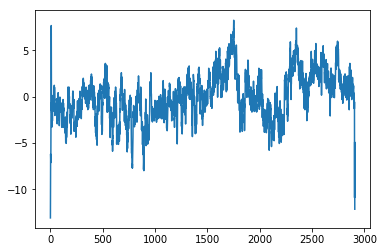

In [55]:
plt.plot(range(mfcc_data.shape[0]),[i[1] for i in mfcc_data])

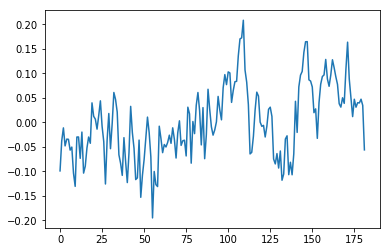

In [56]:
plt.plot(range(b.shape[0]),[i[0] for i in b])

In [17]:
mfcc_data[0]

array([  0.   , -13.087,   7.458,  -5.491,   2.982,   0.123,   4.196,
        -2.236,   7.521,  -0.076,  -3.084,   0.556,   6.642,  -0.151,
         1.801,  -1.697,   1.338,  -0.977,   1.582,   0.623,   0.906,
         2.316,  -0.494,   0.871,   2.005,  -0.69 ,   0.   ,  -0.076,
        -0.098,  -0.073,  -0.218,  -0.073,  -0.078,   0.052,  -0.11 ,
         0.185,  -0.124,  -0.286,   0.216,   0.   ])

In [64]:
b.shape

(182, 40)

In [ ]:





if __name__ == "__main__":
    for arg in sys.argv[1:]:
        a = np.asarray(extractSpeechData(arg))
        b = np.empty([30, ])
        for n in range(1, len(a[0])):
            c = upSampling(a[:, n], rate)
            b = np.column_stack((b, c))
        b = normalize(b, axis=0)
        np.save(arg, b[:, 1:])